In [ ]:
"""Basic Data Exploration
How many unique tracks and artists are there in the dataset?

What is the average number of streams? What is the max and min?

Which artist appears the most times in the dataset?

On which date were the most songs charted?

How many songs are from each region?

📈 Data Analysis
Top 5 most streamed tracks (track name + artist)?

Top 5 artists by total streams?

What’s the average position of each artist’s songs?

Which region has the highest average streams?

Are there any duplicate entries? If yes, remove them.

🧹 Data Cleaning
Check for any missing values. If any, handle them appropriately.

Convert the Date column to datetime format and sort the data by date.

Extract and add a new column for Day of the Week from the Date.

Categorize Streams into buckets: Low (<500k), Medium (500k–2M), High (>2M).

📊 Visualization Ideas (Matplotlib / Seaborn / Plotly)
Bar chart of top 10 most frequent artists.

Line plot of total streams over time.

Pie chart of song counts by region.

Heatmap showing average position by region and artist.

Histogram of song positions (to see how often songs are top ranked).

Scatter plot: Streams vs Position (is there a relationship?).
WordCloud Questions for Your Project
🎵 Track Titles
Which words appear most frequently in track titles?
→ Create a WordCloud from the Track Name column.

Are there any common themes or patterns in song names (e.g., love, night, heart)?
→ Use a wordcloud to explore dominant keywords in titles.

🎤 Artist Names
Which artists appear most frequently in the dataset?
→ Generate a wordcloud of Artist values (consider repeating names based on frequency).

Are there any artists that dominate a particular region's charts?
→ Filter the data by Region, then generate region-specific artist wordclouds.

🌍 Region-wise Popularity
How do song titles differ across regions?
→ Create separate wordclouds for each Region to compare trends.

Which track titles are common in the USA vs India vs UK?
→ Create and compare multiple wordclouds by filtering the dataset by region.

🧪 Optional Add-ons
Clean common stop words like “the”, “and”, “feat”, “remix”

Highlight tracks with more than 2 million streams for a "Top Hits" wordcloud

Style with artist-themed color palettes using WordCloud(colormap="viridis") or similar"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
""""""Basic Data Exploration
How many unique tracks and artists are there in the dataset?

What is the average number of streams? What is the max and min?

Which artist appears the most times in the dataset?

On which date were the most songs charted?

How many songs are from each region?"""

In [2]:
df=pd.read_csv(r"C:\Users\ladwa\Desktop\New folder (6)\spotify_sample_100.csv")

In [3]:
df.columns

Index(['Track Name', 'Artist', 'Streams', 'Position', 'Date', 'Region', 'URL'], dtype='object')

In [4]:
df.head()

Track Name         Artist  Streams  Position        Date     Region  \
0   Track 41  Ariana Grande  1129098       178  2025-06-22     Brazil   
1   Track 81  Justin Bieber  2316026       124  2025-06-02         UK   
2   Track 20   Taylor Swift  3153623       199  2025-06-11  Australia   
3   Track 68   Taylor Swift  2265955       152  2025-06-08      India   
4   Track 77     The Weeknd  1877403        58  2025-06-07     France   

                                       URL  
0  https://open.spotify.com/track/90166260  
1  https://open.spotify.com/track/74219882  
2  https://open.spotify.com/track/92350760  
3  https://open.spotify.com/track/87452853  
4  https://open.spotify.com/track/40917826

In [5]:
#How many unique tracks and artists are there in the dataset?
track=df["Track Name"].nunique()
artist=df["Artist"].nunique()
print("unique tracks :",track)
print("Different artist:",artist)

unique tracks : 66
Different artist: 10


In [6]:
#What is the average number of streams? What is the max and min
df["Streams"].mean()

2592462.96

In [7]:
tf=df["Streams"].max()
tf

4885762

In [8]:
df["Streams"].min()


165934

In [9]:
#Which artist appears the most times in the dataset?
df["Artist"].value_counts().sort_values(ascending=False).head(1)


Artist
Taylor Swift    14
Name: count, dtype: int64

In [10]:
#On which date were the most songs charted?#Date
df["Date"].duplicated().sum()
df["Date"].value_counts().sort_values(ascending=False).head(1)

Date
2025-06-23    9
Name: count, dtype: int64

In [11]:
#How many songs are from each region?
#Region
df["Region"].value_counts()


Region
India        15
Japan        13
Brazil       11
UK           11
Australia    11
Canada       10
Mexico        9
USA           7
Germany       7
France        6
Name: count, dtype: int64

In [12]:
"""Data Analysis
Top 5 most streamed tracks (track name + artist)?

Top 5 artists by total streams?

What’s the average position of each artist’s songs?

Which region has the highest average streams?

Are there any duplicate entries? If yes, remove them"""

'Data Analysis\nTop 5 most streamed tracks (track name + artist)?\n\nTop 5 artists by total streams?\n\nWhat’s the average position of each artist’s songs?\n\nWhich region has the highest average streams?\n\nAre there any duplicate entries? If yes, remove them'

In [13]:
df.columns

Index(['Track Name', 'Artist', 'Streams', 'Position', 'Date', 'Region', 'URL'], dtype='object')

In [14]:
#Top 5 most streamed tracks (track name + artist)?
df.groupby("Artist")["Track Name"].value_counts().head(5)


Artist         Track Name
Ariana Grande  Track 29      1
               Track 32      1
               Track 41      1
               Track 52      1
               Track 54      1
Name: count, dtype: int64

In [15]:
top_5=df[["Artist","Track Name","Streams"]].sort_values(by="Streams",ascending=False).head(5)

In [16]:
top_5

Artist Track Name  Streams
43  Ariana Grande   Track 29  4885762
69          Drake   Track 52  4867766
39       Doja Cat    Track 5  4822747
59            BTS   Track 88  4812930
82          Drake   Track 14  4665569

In [17]:
#Top 5 artists by total streams
df.groupby("Artist")["Streams"].sum().sort_values(ascending=False).head(5)

Artist
Taylor Swift     34552911
Drake            33818881
Doja Cat         32740663
Ariana Grande    32237057
BTS              29290733
Name: Streams, dtype: int64

In [18]:
#What’s the average position of each artist’s songs? Position	
df.groupby("Artist")["Position"].mean()

Artist
Ariana Grande      84.000000
BTS                98.181818
Bad Bunny          69.875000
Doja Cat           83.615385
Drake             114.928571
Ed Sheeran         92.333333
Justin Bieber     124.000000
Olivia Rodrigo    103.750000
Taylor Swift      101.642857
The Weeknd        116.333333
Name: Position, dtype: float64

In [19]:
#Which region has the highest average streams Artist', 'Streams', 'Position', 'Date', 'Region
df.groupby("Region")["Streams"].mean().sort_values(ascending=False).head(5)

Region
Australia    3.545476e+06
France       3.311119e+06
Canada       2.820161e+06
Brazil       2.763487e+06
Japan        2.710322e+06
Name: Streams, dtype: float64

In [20]:
#Are there any duplicate entries? If yes, remove them"""
df.duplicated().sum()

0

In [21]:
df.drop_duplicates()


Track Name         Artist  Streams  Position        Date     Region  \
0    Track 41  Ariana Grande  1129098       178  2025-06-22     Brazil   
1    Track 81  Justin Bieber  2316026       124  2025-06-02         UK   
2    Track 20   Taylor Swift  3153623       199  2025-06-11  Australia   
3    Track 68   Taylor Swift  2265955       152  2025-06-08      India   
4    Track 77     The Weeknd  1877403        58  2025-06-07     France   
..        ...            ...      ...       ...         ...        ...   
95   Track 92      Bad Bunny   867550        96  2025-06-15    Germany   
96   Track 47       Doja Cat  4229170        51  2025-06-24    Germany   
97   Track 88   Taylor Swift  2774590       127  2025-06-07     Mexico   
98   Track 54  Ariana Grande  1531174       102  2025-06-22     Brazil   
99   Track 78       Doja Cat  3371554       147  2025-06-14     Mexico   

                                        URL  
0   https://open.spotify.com/track/90166260  
1   https://open.spotify.com/track/74219882  
2   https://open.spotify.com/track/92350760  
3   https://open.spotify.com/track/87452853  
4   https://open.spotify.com/track/40917826  
..                                      ...  
95  https://open.spotify.com/track/35527688  
96  https://open.spotify.com/track/52071239  
97  https://open.spotify.com/track/20606598  
98  https://open.spotify.com/track/53457288  
99  https://open.spotify.com/track/86786201  

[100 rows x 7 columns]

In [22]:
"""🧹 Data Cleaning
Check for any missing values. If any, handle them appropriately.

Convert the Date column to datetime format and sort the data by date.

Extract and add a new column for Day of the Week from the Date.

Categorize Streams into buckets: Low (<500k), Medium (500k–2M), High (>2M)."""


'🧹 Data Cleaning\nCheck for any missing values. If any, handle them appropriately.\n\nConvert the Date column to datetime format and sort the data by date.\n\nExtract and add a new column for Day of the Week from the Date.\n\nCategorize Streams into buckets: Low (<500k), Medium (500k–2M), High (>2M).'

In [23]:
#Check for any missing values. If any, handle them appropriately.
df.isnull().sum()

Track Name    0
Artist        0
Streams       0
Position      0
Date          0
Region        0
URL           0
dtype: int64

In [24]:
df.dropna()

Track Name         Artist  Streams  Position        Date     Region  \
0    Track 41  Ariana Grande  1129098       178  2025-06-22     Brazil   
1    Track 81  Justin Bieber  2316026       124  2025-06-02         UK   
2    Track 20   Taylor Swift  3153623       199  2025-06-11  Australia   
3    Track 68   Taylor Swift  2265955       152  2025-06-08      India   
4    Track 77     The Weeknd  1877403        58  2025-06-07     France   
..        ...            ...      ...       ...         ...        ...   
95   Track 92      Bad Bunny   867550        96  2025-06-15    Germany   
96   Track 47       Doja Cat  4229170        51  2025-06-24    Germany   
97   Track 88   Taylor Swift  2774590       127  2025-06-07     Mexico   
98   Track 54  Ariana Grande  1531174       102  2025-06-22     Brazil   
99   Track 78       Doja Cat  3371554       147  2025-06-14     Mexico   

                                        URL  
0   https://open.spotify.com/track/90166260  
1   https://open.spotify.com/track/74219882  
2   https://open.spotify.com/track/92350760  
3   https://open.spotify.com/track/87452853  
4   https://open.spotify.com/track/40917826  
..                                      ...  
95  https://open.spotify.com/track/35527688  
96  https://open.spotify.com/track/52071239  
97  https://open.spotify.com/track/20606598  
98  https://open.spotify.com/track/53457288  
99  https://open.spotify.com/track/86786201  

[100 rows x 7 columns]

In [25]:
#Convert the Date column to datetime format and sort the data by date.
from datetime import date
df["Date"]=pd.to_datetime(df["Date"])

In [26]:
#sort the data by date.
df.sort_values(by="Date")

Track Name         Artist  Streams  Position       Date   Region  \
65   Track 84     Ed Sheeran  1298084        91 2025-06-02       UK   
1    Track 81  Justin Bieber  2316026       124 2025-06-02       UK   
45   Track 48     The Weeknd  2054733       146 2025-06-02  Germany   
27   Track 59      Bad Bunny  3116674        18 2025-06-02    Japan   
10   Track 10       Doja Cat  1628316         4 2025-06-03       UK   
..        ...            ...      ...       ...        ...      ...   
69   Track 52          Drake  4867766        14 2025-06-26   France   
67   Track 82  Justin Bieber  1677586       124 2025-06-27    Japan   
82   Track 14          Drake  4665569       171 2025-06-29   France   
74   Track 88       Doja Cat  1733006       110 2025-06-30    Japan   
71   Track 42       Doja Cat  4633708       100 2025-06-30      USA   

                                        URL  
65  https://open.spotify.com/track/15784861  
1   https://open.spotify.com/track/74219882  
45  https://open.spotify.com/track/42780349  
27  https://open.spotify.com/track/33618128  
10  https://open.spotify.com/track/68660871  
..                                      ...  
69  https://open.spotify.com/track/26805375  
67  https://open.spotify.com/track/17103981  
82  https://open.spotify.com/track/16522134  
74  https://open.spotify.com/track/46540841  
71  https://open.spotify.com/track/36922056  

[100 rows x 7 columns]

In [27]:
#Extract and add a new column for Day of the Week from the Date
df["Day"]=df["Date"].dt.day_name()


In [28]:
df

Track Name         Artist  Streams  Position       Date     Region  \
0    Track 41  Ariana Grande  1129098       178 2025-06-22     Brazil   
1    Track 81  Justin Bieber  2316026       124 2025-06-02         UK   
2    Track 20   Taylor Swift  3153623       199 2025-06-11  Australia   
3    Track 68   Taylor Swift  2265955       152 2025-06-08      India   
4    Track 77     The Weeknd  1877403        58 2025-06-07     France   
..        ...            ...      ...       ...        ...        ...   
95   Track 92      Bad Bunny   867550        96 2025-06-15    Germany   
96   Track 47       Doja Cat  4229170        51 2025-06-24    Germany   
97   Track 88   Taylor Swift  2774590       127 2025-06-07     Mexico   
98   Track 54  Ariana Grande  1531174       102 2025-06-22     Brazil   
99   Track 78       Doja Cat  3371554       147 2025-06-14     Mexico   

                                        URL        Day  
0   https://open.spotify.com/track/90166260     Sunday  
1   https://open.spotify.com/track/74219882     Monday  
2   https://open.spotify.com/track/92350760  Wednesday  
3   https://open.spotify.com/track/87452853     Sunday  
4   https://open.spotify.com/track/40917826   Saturday  
..                                      ...        ...  
95  https://open.spotify.com/track/35527688     Sunday  
96  https://open.spotify.com/track/52071239    Tuesday  
97  https://open.spotify.com/track/20606598   Saturday  
98  https://open.spotify.com/track/53457288     Sunday  
99  https://open.spotify.com/track/86786201   Saturday  

[100 rows x 8 columns]

In [29]:
#Categorize Streams into buckets: Low (<500k), Medium (500k–2M), High (>2M).
low=df[df["Streams"]<5000]

In [30]:
median_val=df["Streams"].median()
medium=df[df["Streams"]<=median_val]

In [31]:
medium.head()

Track Name         Artist  Streams  Position       Date  Region  \
0   Track 41  Ariana Grande  1129098       178 2025-06-22  Brazil   
1   Track 81  Justin Bieber  2316026       124 2025-06-02      UK   
3   Track 68   Taylor Swift  2265955       152 2025-06-08   India   
4   Track 77     The Weeknd  1877403        58 2025-06-07  France   
6   Track 43   Taylor Swift   523473       143 2025-06-03  Brazil   

                                       URL       Day  
0  https://open.spotify.com/track/90166260    Sunday  
1  https://open.spotify.com/track/74219882    Monday  
3  https://open.spotify.com/track/87452853    Sunday  
4  https://open.spotify.com/track/40917826  Saturday  
6  https://open.spotify.com/track/62528892   Tuesday

In [32]:
max_val=df[df["Streams"]>=median_val]

In [33]:
"""
📊 Visualization Ideas (Matplotlib / Seaborn / Plotly)
Bar chart of top 10 most frequent artists.

Line plot of total streams over time.

Pie chart of song counts by region.

Heatmap showing average position by region and artist.

Histogram of song positions (to see how often songs are top ranked)."""

'\n📊 Visualization Ideas (Matplotlib / Seaborn / Plotly)\nBar chart of top 10 most frequent artists.\n\nLine plot of total streams over time.\n\nPie chart of song counts by region.\n\nHeatmap showing average position by region and artist.\n\nHistogram of song positions (to see how often songs are top ranked).'

In [34]:
#Bar chart of top 10 most frequent artists
bar_ch=df["Artist"].value_counts().sort_values(ascending=False).head(10)

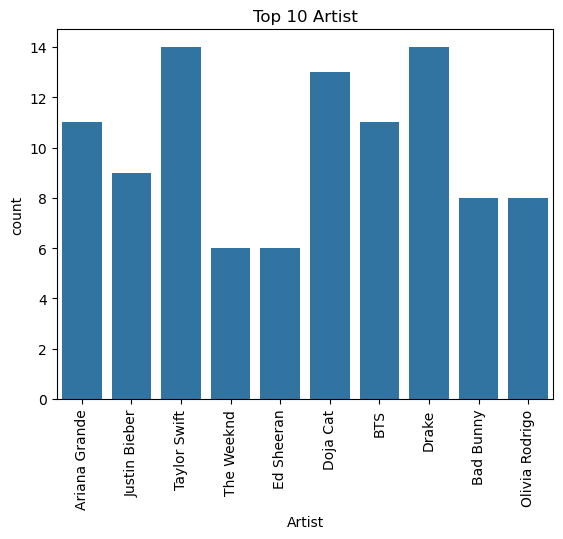

In [35]:
#Bar chart of top 10 most frequent artists
sns.countplot(data=df,x="Artist")
plt.title("Top 10 Artist")
plt.xticks(rotation=90)
plt.show()


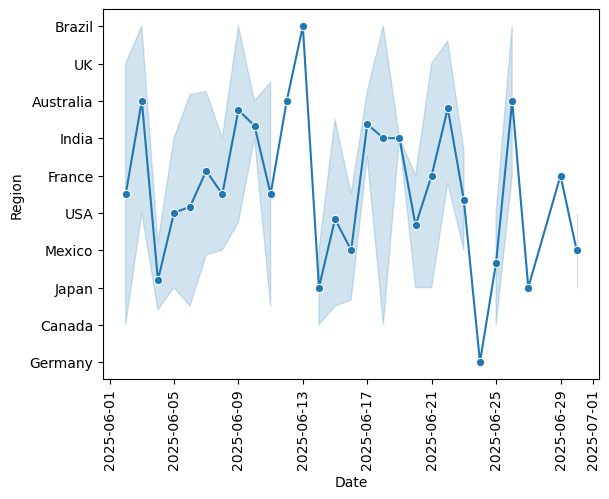

In [36]:
#Line plot of total streams over time
sns.lineplot(data=df,x="Date",y="Region",marker='o')
plt.xticks(rotation=90)
plt.show()



In [37]:
import plotly.express as px

In [38]:
import plotly.graph_objects as go

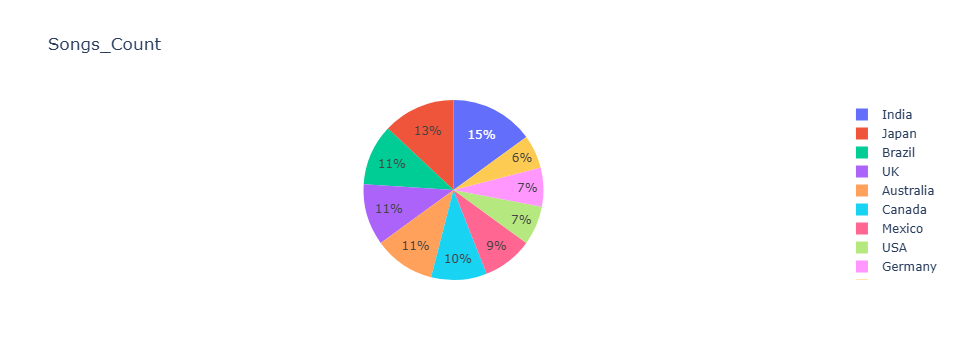

<Figure size 700x700 with 0 Axes>

In [39]:
#Pie chart of song counts by region
fig=px.pie(
    df,
    names="Region",
    values=None,
    title="Songs_Count")
plt.figure(figsize=(7,7))
fig.show()

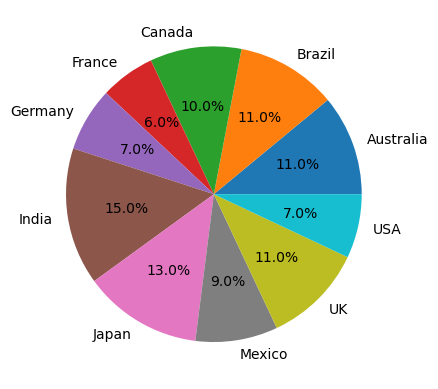

In [40]:
mat=df["Region"].value_counts().sort_index()
plt.pie(mat,labels=mat.index,autopct="%1.1f%%")
plt.show()

In [41]:
df.columns

Index(['Track Name', 'Artist', 'Streams', 'Position', 'Date', 'Region', 'URL',
       'Day'],
      dtype='object')

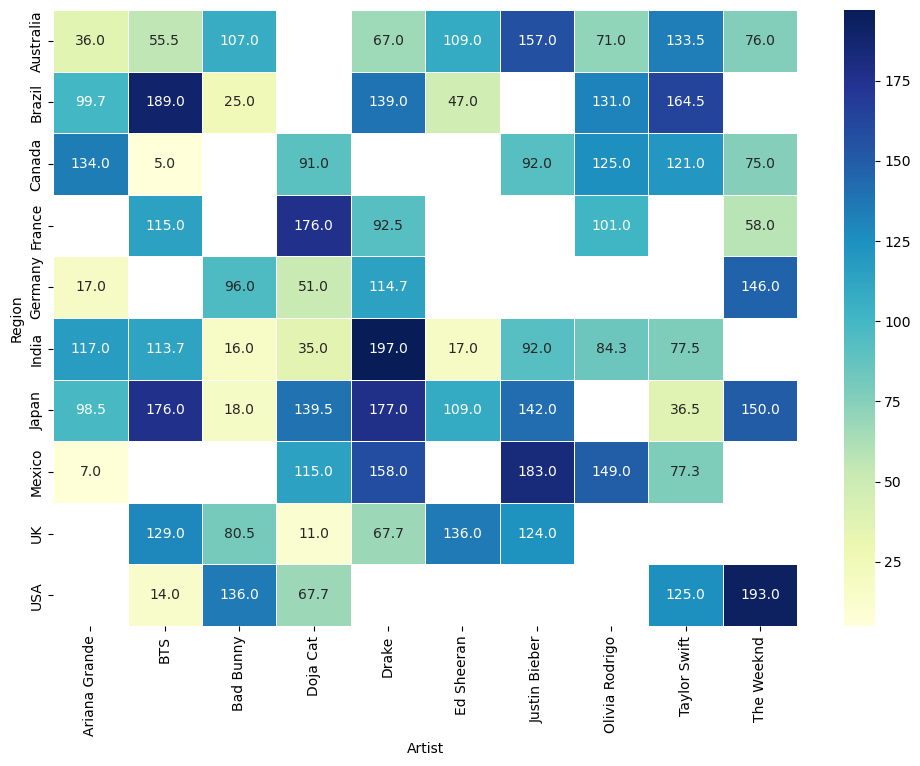

In [42]:
#Heatmap showing average position by region and artist
pivot_table = df.pivot_table(index="Region", columns="Artist", values="Position", aggfunc="mean")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [45]:
#Histogram of song positions (to see how often songs are top ranked)PositionTrack Name
sum_d=df.groupby("Track Name")["Position"].value_counts()

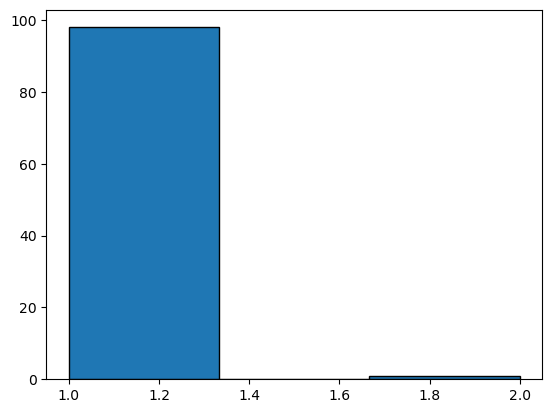

In [46]:
plt.hist(sum_d,bins=3,edgecolor="black")
plt.show()


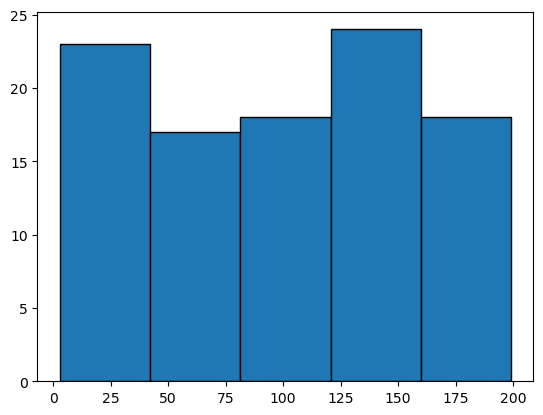

In [44]:
plt.hist(df["Position"],bins=5,edgecolor="black")
plt.show()

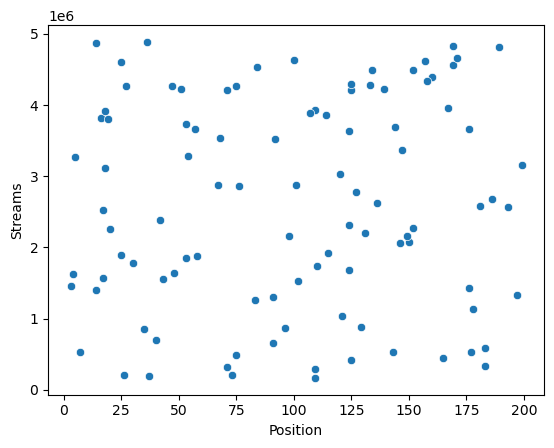

In [47]:
#Scatter plot: Streams vs Position (is there a relationship?)
sns.scatterplot(data=df,x="Position",y="Streams")
plt.show()

In [48]:
"""WordCloud Questions for Your Project
🎵 Track Titles
Which words appear most frequently in track titles?
→ Create a WordCloud from the Track Name column.

Are there any common themes or patterns in song names (e.g., love, night, heart)?
→ Use a wordcloud to explore dominant keywords in titles.

🎤 Artist Names
Which artists appear most frequently in the dataset?
→ Generate a wordcloud of Artist values (consider repeating names based on frequency).

Are there any artists that dominate a particular region's charts?
→ Filter the data by Region, then generate region-specific artist wordclouds."""

"WordCloud Questions for Your Project\n🎵 Track Titles\nWhich words appear most frequently in track titles?\n→ Create a WordCloud from the Track Name column.\n\nAre there any common themes or patterns in song names (e.g., love, night, heart)?\n→ Use a wordcloud to explore dominant keywords in titles.\n\n🎤 Artist Names\nWhich artists appear most frequently in the dataset?\n→ Generate a wordcloud of Artist values (consider repeating names based on frequency).\n\nAre there any artists that dominate a particular region's charts?\n→ Filter the data by Region, then generate region-specific artist wordclouds."

In [51]:
df.columns

Index(['Track Name', 'Artist', 'Streams', 'Position', 'Date', 'Region', 'URL',
       'Day'],
      dtype='object')

In [49]:
from wordcloud import WordCloud,STOPWORDS

In [50]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [52]:
#Create a WordCloud from the Track Name column
trac_s=''.join(df["Track Name"])

(-0.5, 399.5, 199.5, -0.5)

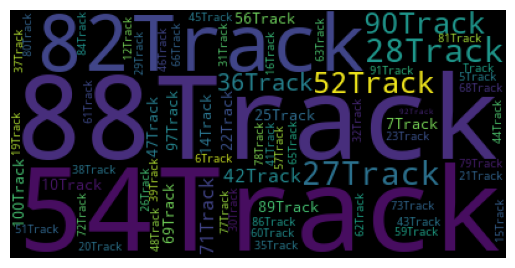

In [55]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(trac_s)
plt.imshow(wordcloud)
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

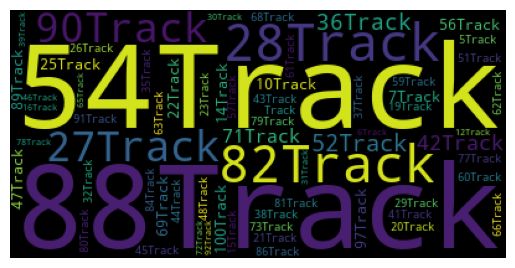

In [61]:
#Use a wordcloud to explore dominant keywords in titles
stopwords=set(["love", "night","heart"])
title_com=''.join(df["Track Name"])
wordcloud2=WordCloud(stopwords=stopwords).generate(title_com)
plt.imshow(wordcloud2)
plt.axis('off')


In [72]:
# Generate a wordcloud of Artist values
filter_1=df["Artist"].value_counts()


(-0.5, 399.5, 199.5, -0.5)

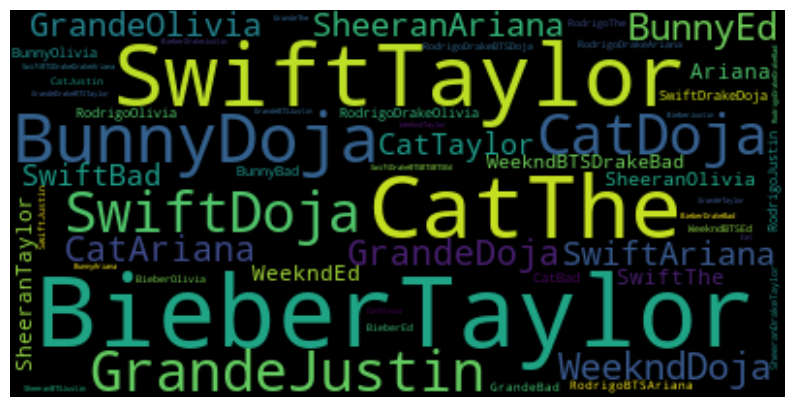

In [75]:
total_art=''.join(df["Artist"])
wordcl=WordCloud(stopwords=set(STOPWORDS)).generate(total_art)
plt.figure(figsize=(10, 10))
plt.imshow(wordcl,interpolation='bilinear')
plt.axis('off')

In [81]:
#Filter the data by Region, then generate region-specific artist wordclouds
filter_R=df["Region"].unique()

In [77]:
filter_R

Region
India        15
Japan        13
Brazil       11
UK           11
Australia    11
Canada       10
Mexico        9
USA           7
Germany       7
France        6
Name: count, dtype: int64

In [82]:
total_r=df[df["Region"]==filter_R]

ValueError: ('Lengths must match to compare', (100,), (10,))

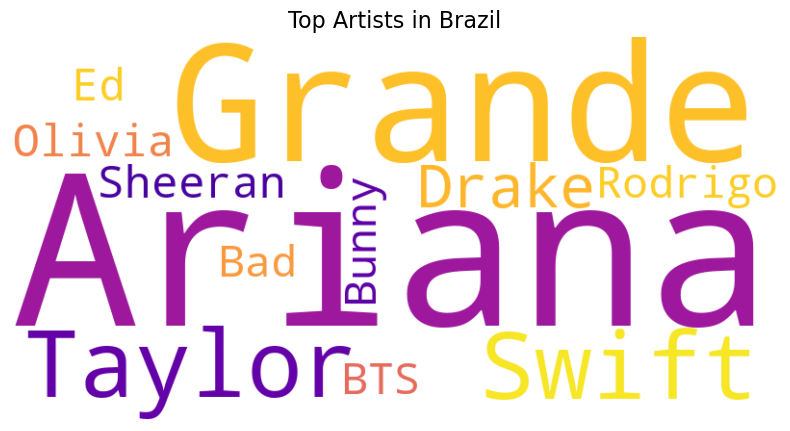

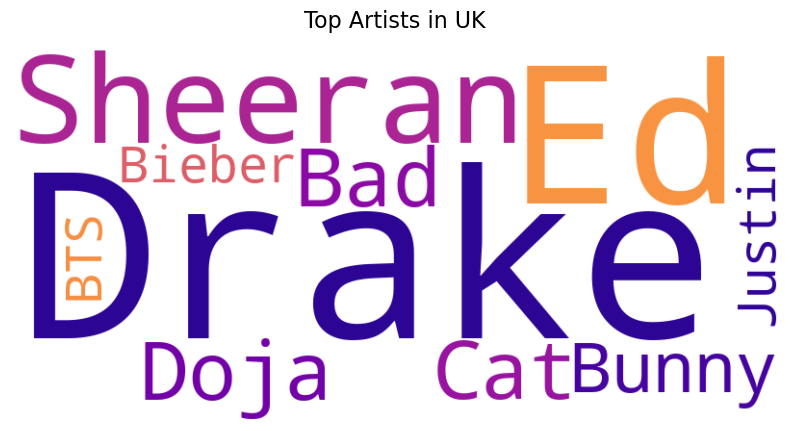

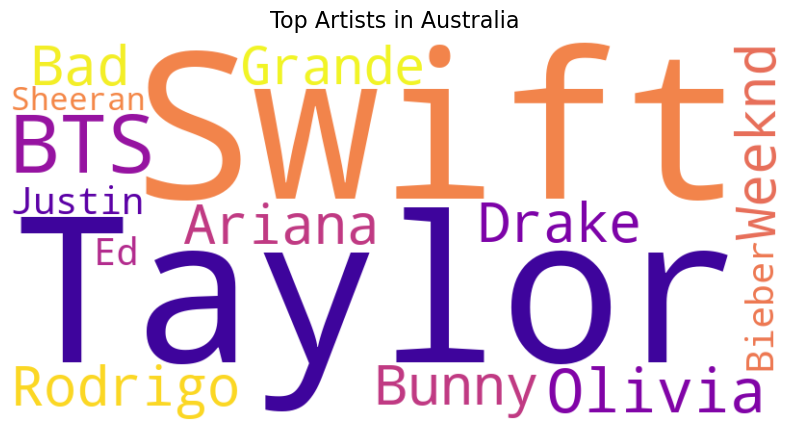

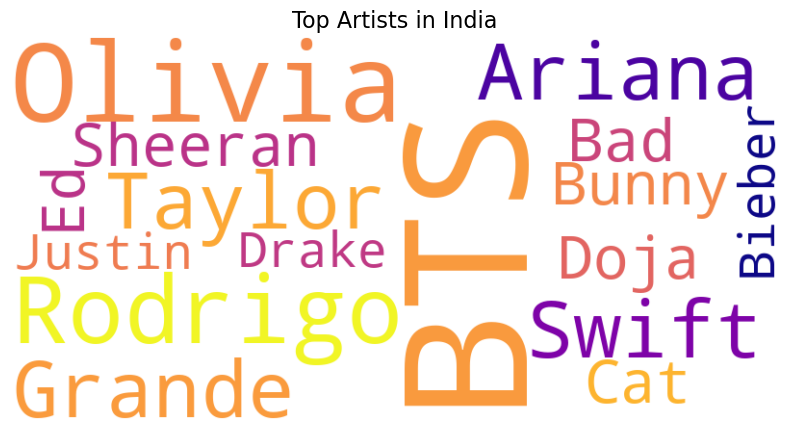

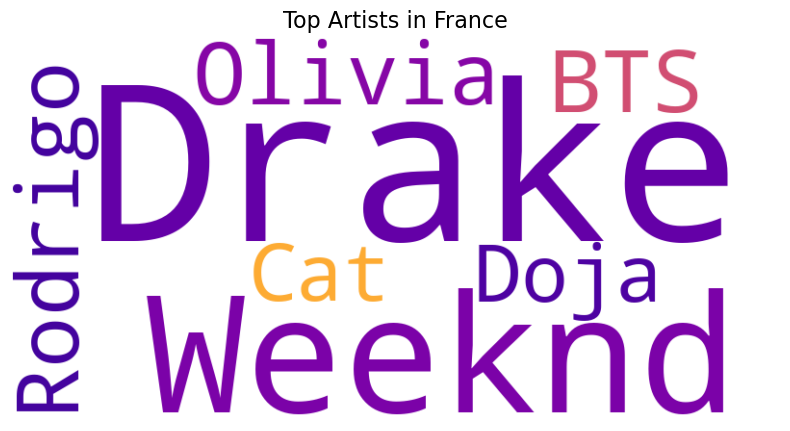

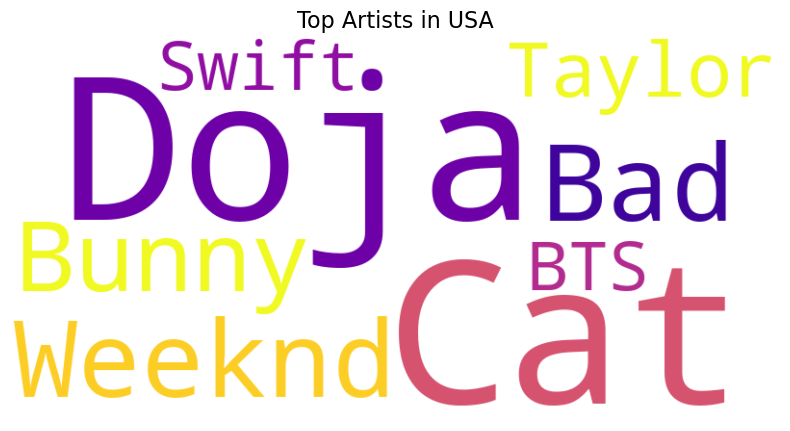

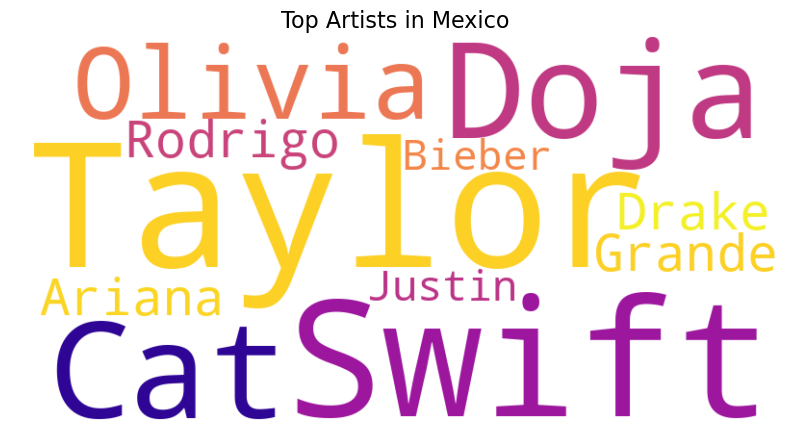

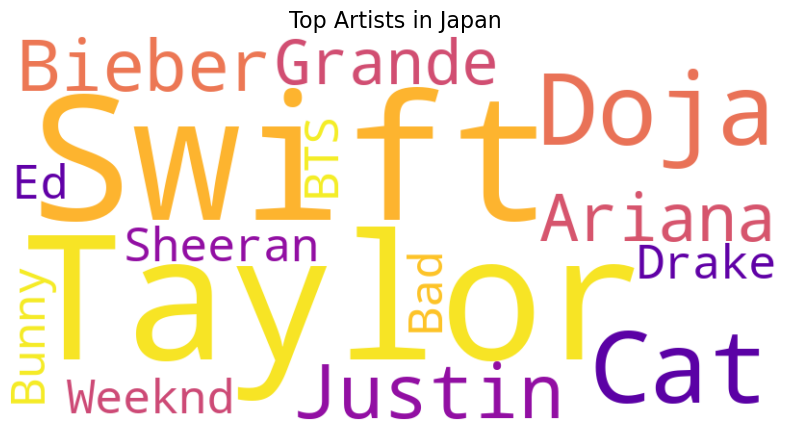

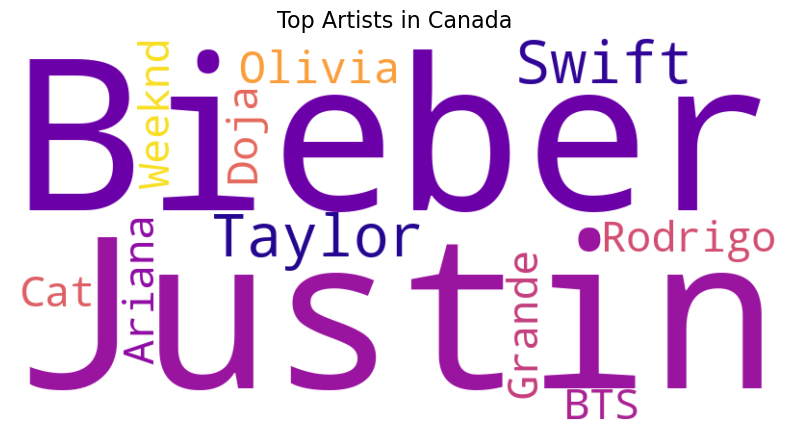

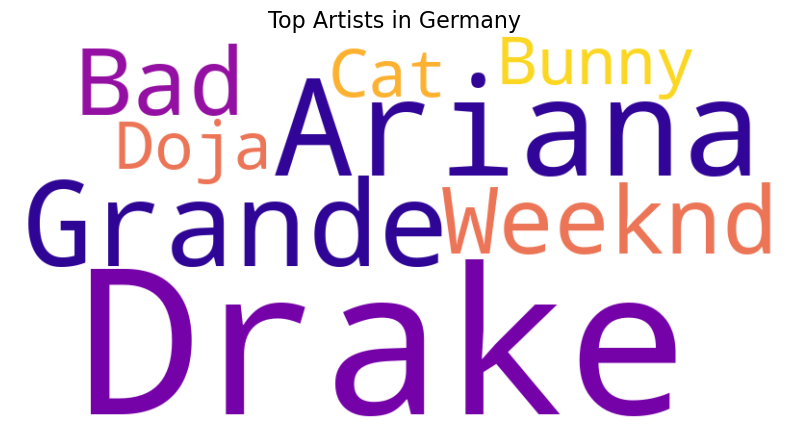

In [84]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

"""# Load your dataset
df = pd.read_csv("spotify_songs.csv")  # Replace with your actual filename

# Make sure "Region" and "Artist" columns exist
print(df.columns)  # Optional check
"""
# Get the list of unique regions
regions = df['Region'].unique()

# Generate a wordcloud for each region
for region in regions:
    # Filter the DataFrame by region
    region_df = df[df["Region"] == region]
    
    # Combine all artist names into one string
    artist_string = " ".join(region_df["Artist"].astype(str))
    
    # Create wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(artist_string)
    
    # Plot the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top Artists in {region}", fontsize=16)
    plt.show()
